<a href="https://colab.research.google.com/github/pav16an/PWSKILLS_FULLSTACK_DATA_SCIENCE_PRO/blob/main/executed_EDA_heart_failure_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on Heart Failure Clinical Records Dataset

This notebook answers the EDA questions based on the heart failure clinical records dataset.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/heart_failure_clinical_records_dataset (2).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 1. What is the distribution of age among heart failure patients in the dataset?

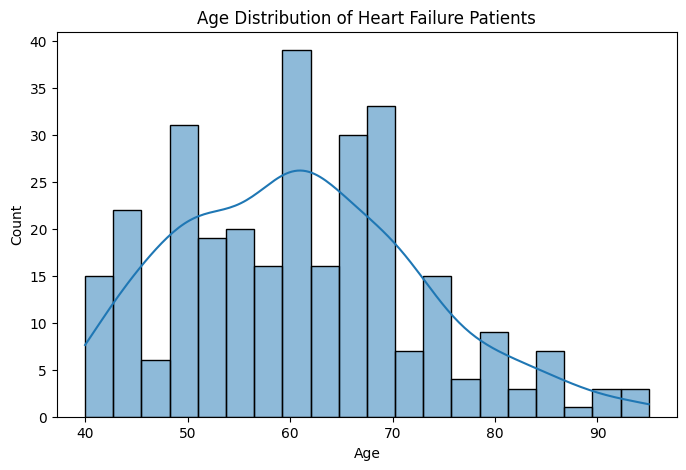

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 2. How does the death rate vary with age?

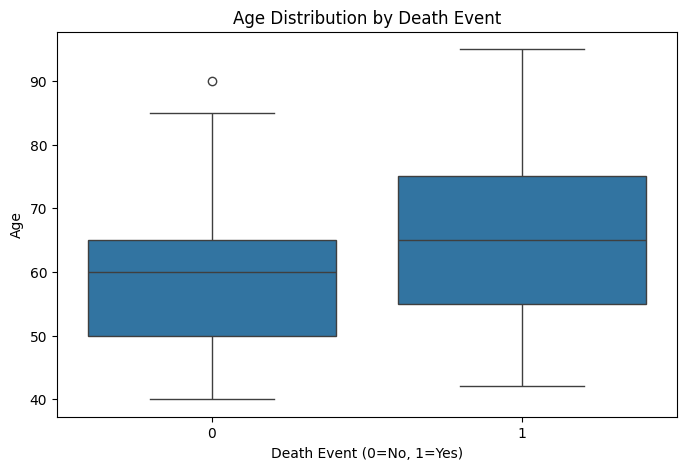

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age Distribution by Death Event')
plt.xlabel('Death Event (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

## 3. What is the percentage of male and female patients in the dataset?

Female    64.882943
Male      35.117057
Name: proportion, dtype: float64


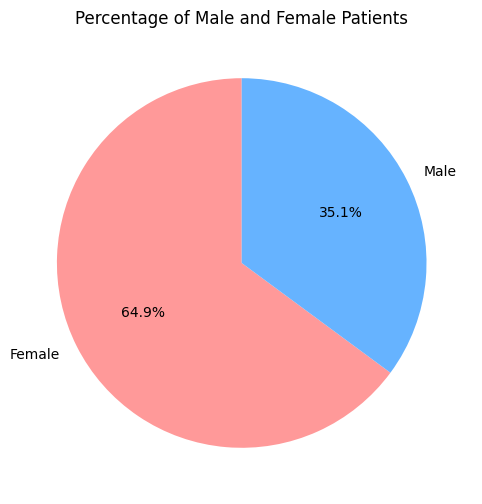

In [ ]:
gender_counts = df['sex'].value_counts(normalize=True) * 100
gender_counts.index = ['Female', 'Male']
print(gender_counts)

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Male and Female Patients')
plt.show()

## 4. How does the platelet count vary among different age groups?

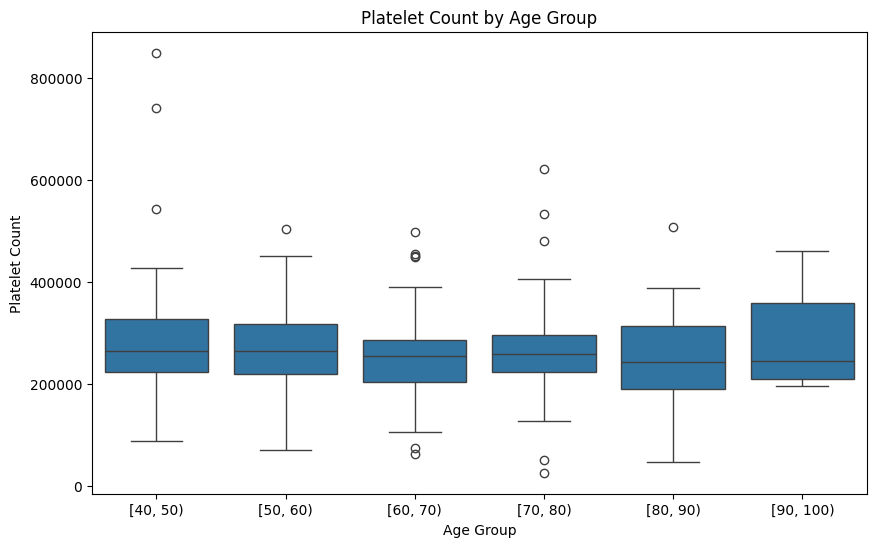

In [ ]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[40,50,60,70,80,90,100], right=False)

plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='platelets', data=df)
plt.title('Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.show()

## 5. Is there a correlation between creatinine and sodium levels in the blood?

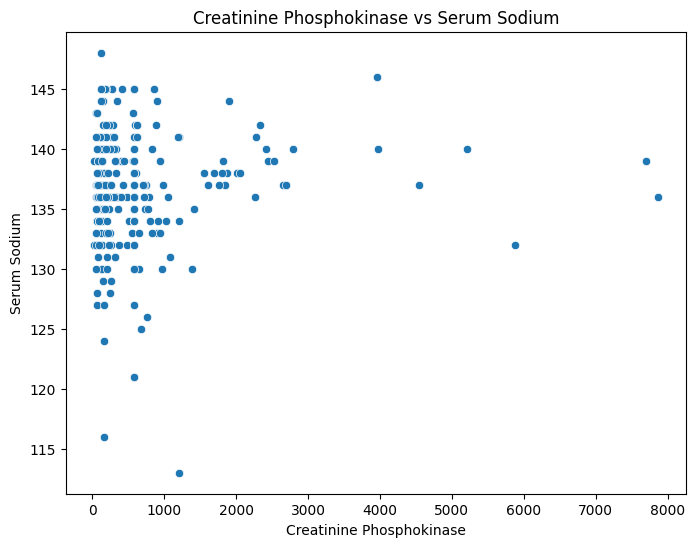

Correlation coefficient: 0.060


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='creatinine_phosphokinase', y='serum_sodium', data=df)
plt.title('Creatinine Phosphokinase vs Serum Sodium')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Serum Sodium')
plt.show()

correlation = df['creatinine_phosphokinase'].corr(df['serum_sodium'])
print(f"Correlation coefficient: {correlation:.3f}")

## 6. How does the prevalence of high blood pressure differ between male and female patients?

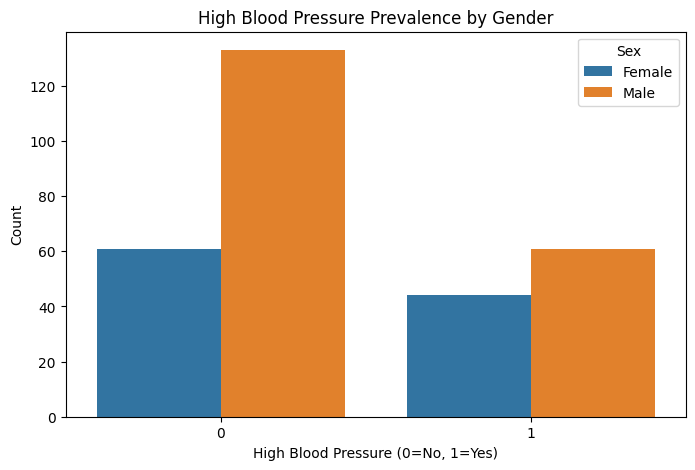

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='high_blood_pressure', hue='sex', data=df)
plt.title('High Blood Pressure Prevalence by Gender')
plt.xlabel('High Blood Pressure (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

## 7. What is the relationship between smoking habits and the occurrence of heart failure?

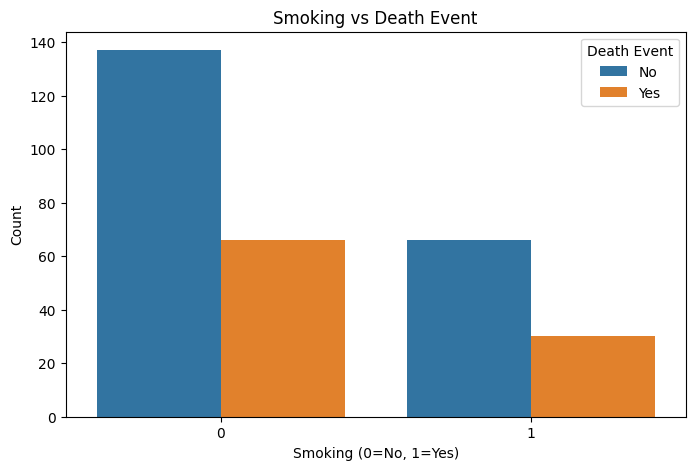

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)
plt.title('Smoking vs Death Event')
plt.xlabel('Smoking (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['No', 'Yes'])
plt.show()

## 8. Are there any noticeable patterns in the distribution of death events across different age groups?

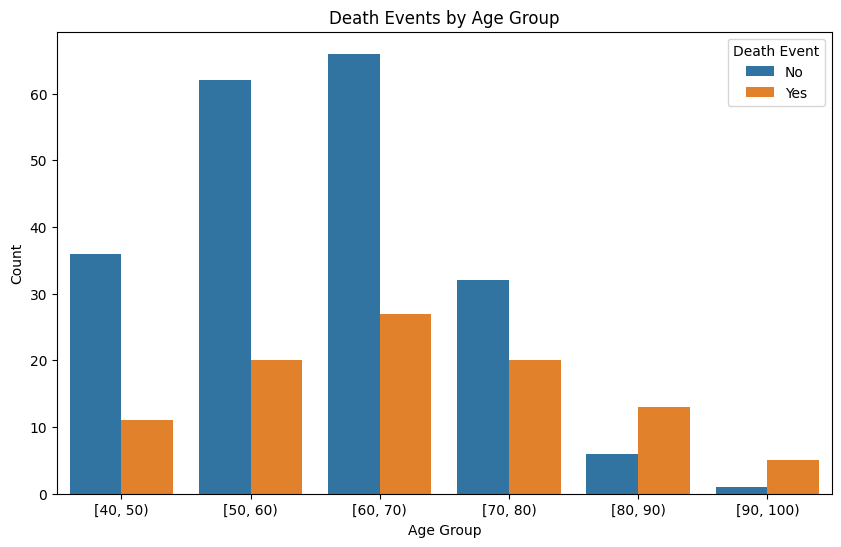

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='age_group', hue='DEATH_EVENT', data=df)
plt.title('Death Events by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['No', 'Yes'])
plt.show()

## 9. Is there any significant difference in ejection fraction between patients with and without diabetes?

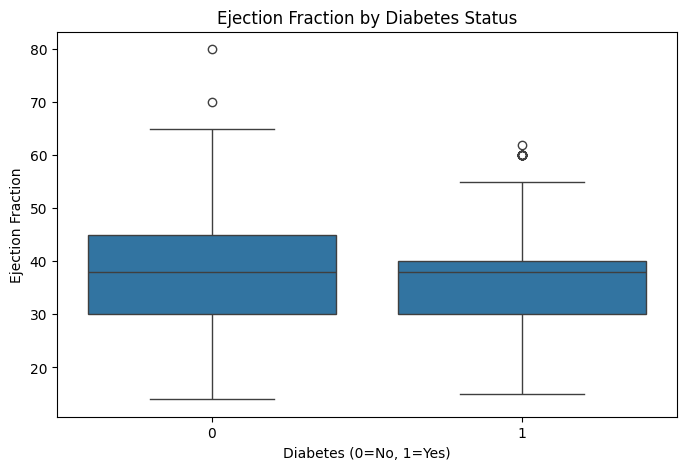

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df)
plt.title('Ejection Fraction by Diabetes Status')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Ejection Fraction')
plt.show()

## 10. How does the serum creatinine level vary between patients who survived and those who did not?

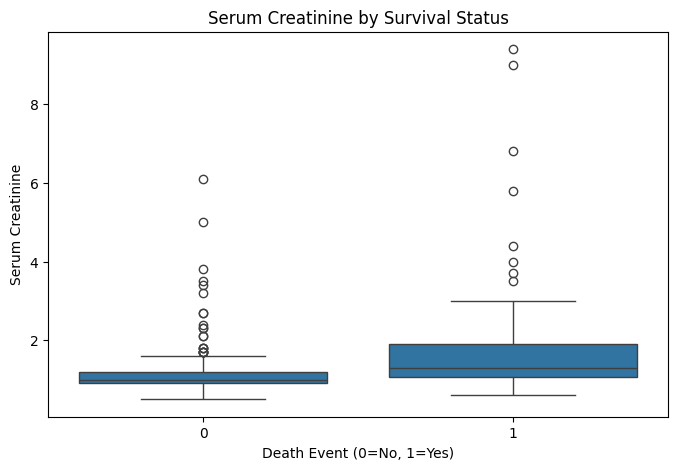

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine by Survival Status')
plt.xlabel('Death Event (0=No, 1=Yes)')
plt.ylabel('Serum Creatinine')
plt.show()